<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 13: Clustering and Regionalization </h3>

# Review 

* Many of the techniques we covered had to do with either one variable (autocorrelation) or pairs of variables (correlation). Today from *univariate* to *multivariate*.

# Clustering 

* Part of unsupervised learning. 
    * Latent patterns in our data 
    * NO LABELS! 
* Groups are not pre-determined (classification)
* DBSCAN - example of density-based clustering

# Classical clustering tasks

* Online shoppers (segmentation) 
* Spotify users who like similar music
* Hospital Patients

# Clustering 

> **Partition** the observations into groups, where each observation is **similar** to another member of the group.

* Partitioning (pre-define number of clusters, pre-defined number of members in a group, pre-define radius) 
* Similarity can be measured differently (attribute space - multidimensional, we can also add geography or spaital similarity to the clustering)

# Regionalization 

> We can think of clusters as regions (similar groups of observations that have common attributes and spatial proximity) 

# Types of Clustering Algorithms 

* Connectivity-based (hierarchical) 
* Centroid-based (k-means, k-medoid, c-means, etc.) 
* Distribution-based (clusters are groups most likely belonging to the same distribution) 
* Density-based (DBSCAN) 
* Grid-based 

In [1]:
import pandas as pd
import geopandas as gpd
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

ModuleNotFoundError: No module named 'pingouin'

# Using PySAL example data

In [2]:
from libpysal.examples import load_example, available

#[_ for _ in available().Name]

cin = load_example('Cincinnati')
cin.get_file_list()

Example not available: Cincinnati
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


['C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\walnuthills_updated\\.DS_Store',
 'C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\walnuthills_updated\\cincinnati.dbf',
 'C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\walnuthills_updated\\cincinnati.prj',
 'C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\walnuthills_updated\\cincinnati.shp',
 'C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\walnuthills_updated\\cincinnati.shx',
 'C:\\Users\\noibar\\AppData\\Local\\pysal\\pysal\\Cincinnati\\__MACOSX\\walnuthills_updated\\._.DS_Store']

In [3]:
cin_df = gpd.read_file(cin.get_path('cincinnati.shp'))
print(cin_df.shape)
cin_df.head()

(457, 73)


,ID,AREA,BLOCK,BG,TRACT,COUNTY,MSA,POPULATION,MALE,FEMALE,...,OWNER_SIZE,RENTER_SIZ,DENSITY,BURGLARY,ASSAULT,THEFT,BURG_D,ASSALT_D,THEFT_D,geometry
0,726907.0,0.09,390610042002001,390610042002,39061004200,39061,1640,479.0,221.0,258.0,...,1.46,1.42,5384.7901,1,0,4,1.0,0.0,1.0,"POLYGON ((1407302.966 415693.734, 1407473.141 ..."
1,695744.0,0.01,390610022004003,390610022004,39061002200,39061,1640,85.0,39.0,46.0,...,3.22,2.15,6643.1423,0,2,2,0.0,1.0,1.0,"POLYGON ((1398841.243 416718.444, 1399605.382 ..."
2,695762.0,0.01,390610033002017,390610033002,39061003300,39061,1640,29.0,18.0,11.0,...,1.00,1.33,4326.5018,0,0,0,0.0,0.0,0.0,"POLYGON ((1398733.468 416975.853, 1398794.240 ..."
3,695780.0,0.01,390610022004002,390610022004,39061002200,39061,1640,117.0,59.0,58.0,...,2.57,2.25,20784.6991,2,3,4,1.0,1.0,1.0,"POLYGON ((1399564.078 416046.633, 1399605.382 ..."
4,695798.0,0.02,390610033001009,390610033001,39061003300,39061,1640,96.0,51.0,45.0,...,1.00,1.42,4019.0506,0,0,2,0.0,0.0,1.0,"POLYGON ((1398841.243 416718.444, 1398733.468 ..."


In [4]:
cin_df[['WHITE', 'AP_WHITE']].describe()

,WHITE,AP_WHITE
count,457.000000,457.000000
mean,23.954048,24.870897
std,65.200837,66.990628
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,4.000000
75%,19.000000,21.000000
max,634.000000,657.000000


In [5]:
cin_df[['OCCHU_OWNE', 'OCCHU_RENT']].describe()

,OCCHU_OWNE,OCCHU_RENT
count,457.000000,457.000000
mean,8.617068,28.070022
std,18.680250,46.020203
min,0.000000,0.000000
25%,0.000000,1.000000
50%,4.000000,14.000000
75%,10.000000,35.000000
max,245.000000,543.000000


<AxesSubplot:>

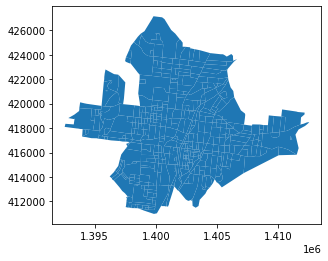

In [6]:
cin_df.plot()

In [7]:
cin_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 73 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          457 non-null    float64 
 1   AREA        457 non-null    float64 
 2   BLOCK       457 non-null    object  
 3   BG          457 non-null    object  
 4   TRACT       457 non-null    object  
 5   COUNTY      457 non-null    object  
 6   MSA         457 non-null    object  
 7   POPULATION  457 non-null    float64 
 8   MALE        457 non-null    float64 
 9   FEMALE      457 non-null    float64 
 10  AGE_0_5     457 non-null    float64 
 11  AGE_5_9     457 non-null    float64 
 12  AGE_10_14   457 non-null    float64 
 13  AGE_15_19   457 non-null    float64 
 14  AGE_20_24   457 non-null    float64 
 15  AGE_25_34   457 non-null    float64 
 16  AGE_35_44   457 non-null    float64 
 17  AGE_45_54   457 non-null    float64 
 18  AGE_55_59   457 non-null    float64 
 19  

In [8]:
# consider only specific variables for clustering 
# see variable description at GEODA lab 
# https://geodacenter.github.io/data-and-lab/walnut_hills/
predictors = ['POPULATION', 'MEDIAN_AGE', 'AGE_65', 'WHITE', 'BLACK', 'ASIAN', 
          'NH_WHITE', 'HOUSEHOLDS', 'AVG_HHSIZE', 'HU_VACANT', 'OCCHU_OWNE', 'OCCHU_RENT']

crime_vars = ['BURGLARY', 'ASSAULT', 'THEFT']

# more examples with plotting available from 
# https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html

In [9]:
f, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(predictors):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    cin_df.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="BuPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)

f.savefig('crime_predictors.png')
plt.close()

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


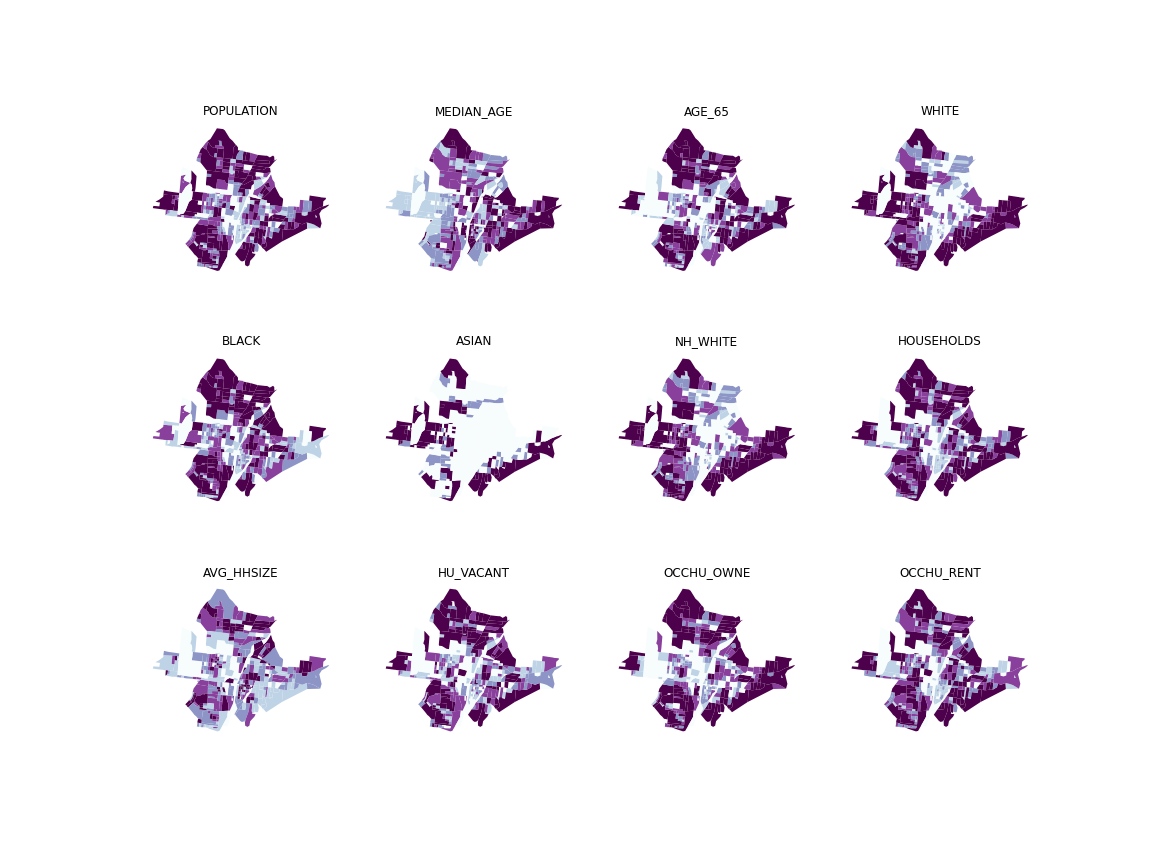

In [10]:
from IPython.display import Image
Image(filename='crime_predictors.png') 

In [11]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(crime_vars):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    cin_df.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="BuPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)

f.savefig('crime_types.png')
plt.close()

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 4
 

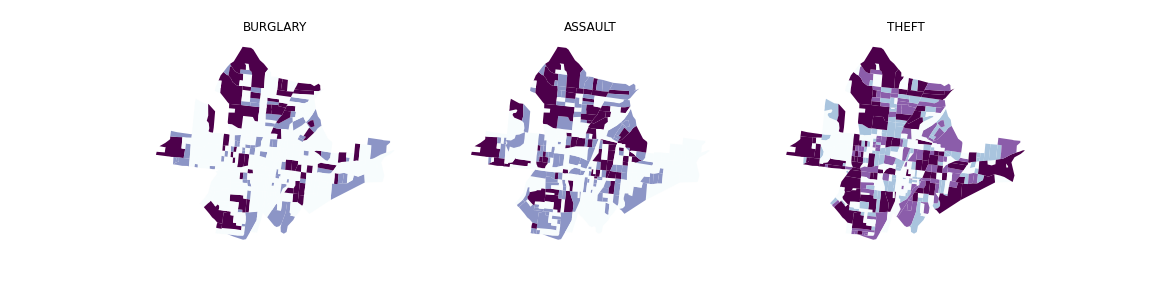

In [12]:
from IPython.display import Image
Image(filename='crime_types.png') 

In [13]:
w = Queen.from_dataframe(cin_df)

# Calculate Moran's I for each variable
mi_results = [
    Moran(cin_df[variable], w) for variable in predictors
]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim)
    for variable, res in zip(predictors, mi_results)
]
# Display on table
table = pd.DataFrame(
    mi_results, columns=["Variable", "Moran's I", "P-value"]
).set_index("Variable")
table

,Moran's I,P-value
Variable,,
POPULATION,0.162529,0.001
MEDIAN_AGE,0.175654,0.001
AGE_65,0.127756,0.003
WHITE,0.264340,0.001
BLACK,0.285679,0.001
ASIAN,0.057050,0.009
NH_WHITE,0.263554,0.001
HOUSEHOLDS,0.165267,0.001
AVG_HHSIZE,0.284141,0.001


> Each of the variables displays significant positive spatial autocorrelation, suggesting clear spatial structure in the socioeconomic geography of San Diego. This means it is likely the clusters we find will have a non random spatial distribution. 

In [14]:
xy_vars = predictors + ['BURGLARY']

corr_df = pg.pairwise_corr(cin_df[xy_vars], method='pearson')
corr_df.loc[corr_df.Y == 'BURGLARY'].sort_values(by='r', ascending=False)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
67,HOUSEHOLDS,BURGLARY,pearson,two-sided,457,0.550126,"[0.48, 0.61]",1.647029e-37,1.683e+34,1.000000
77,OCCHU_RENT,BURGLARY,pearson,two-sided,457,0.541269,"[0.47, 0.6]",3.835054e-36,7.444e+32,1.000000
11,POPULATION,BURGLARY,pearson,two-sided,457,0.499936,"[0.43, 0.57]",2.856307e-30,1.146e+27,1.000000
74,HU_VACANT,BURGLARY,pearson,two-sided,457,0.499887,"[0.43, 0.57]",2.899383e-30,1.129e+27,1.000000
49,BLACK,BURGLARY,pearson,two-sided,457,0.492950,"[0.42, 0.56]",2.351419e-29,1.424e+26,1.000000
76,OCCHU_OWNE,BURGLARY,pearson,two-sided,457,0.385024,"[0.3, 0.46]",1.344824e-17,3.565e+14,1.000000
32,AGE_65,BURGLARY,pearson,two-sided,457,0.377739,"[0.3, 0.45]",6.014186e-17,8.173e+13,1.000000
62,NH_WHITE,BURGLARY,pearson,two-sided,457,0.240948,"[0.15, 0.33]",1.850323e-07,4.481e+04,0.999485
41,WHITE,BURGLARY,pearson,two-sided,457,0.239724,"[0.15, 0.32]",2.142888e-07,3.89e+04,0.999432
71,AVG_HHSIZE,BURGLARY,pearson,two-sided,457,0.144546,"[0.05, 0.23]",1.949163e-03,6.998,0.873839


# Similarity 

* Absolute values will drown variables which have higher range of values (0-1 Vs 0-1000)
* Standardize values by mean and stdev 
* **For non-normal, skewed and bimodal distributions robust scaling may be required!**
* Use **sklearn** package 

# Standardizing Variables 

* **scale()**: $z = \frac{x_i - \bar{x}}{\sigma_x}$
* **robust_scale()**: $z = \frac{x_i - \tilde{x}}{\lceil x \rceil_{75} - \lceil x \rceil_{25}}$ (median and IQR)
* **minmax_scale()**: $z = \frac{x - min(x)}{max(x-min(x))}$ 

In [15]:
from sklearn.preprocessing import robust_scale

db_scaled = robust_scale(cin_df[predictors])

# K-means Clustering 

* Pre-specified number of clusters (groups) 
* Each observation is closer to the mean of its own group than it is to the mean of any other group 

# K-means Clustering Algorithm 

1. Assign all observations to one of the $k$ labels 
2. Calculate multivariate mean over all covaraites for each cluster 
3. Reassign observations to the cluster with closest mean 
4. Repeat and update until there are no more changes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/617px-K-means_convergence.gif">

In [16]:
# Initialise KMeans instance
from sklearn.cluster import KMeans
# Initialise KMeans instance
kmeans = KMeans(n_clusters=5)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)
# Print first five labels
k5cls.labels_[:5]

C:\Users\noibar\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([3, 0, 0, 0, 0])

In [17]:
# Assign labels into a column
cin_df["k5cls"] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
cin_df.plot(
    column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
f.savefig('kmeans.png')
plt.close()

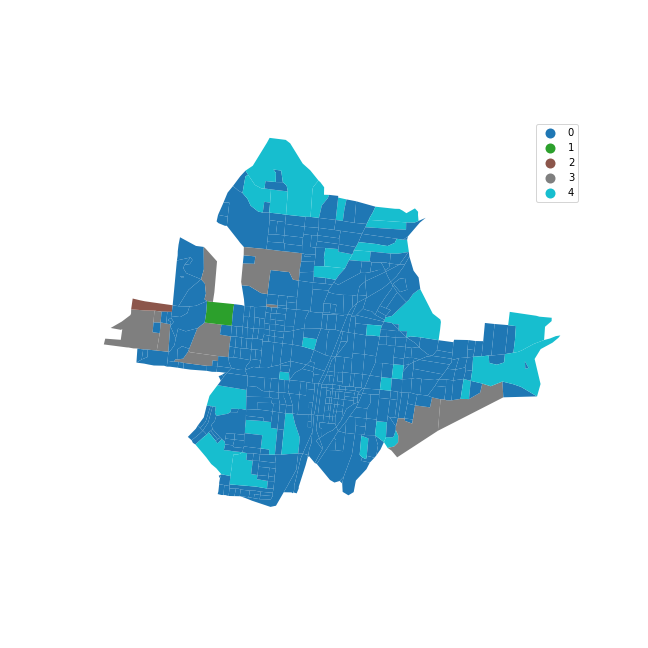

In [18]:
Image(filename='kmeans.png') 

# Characterizing Clusters 

* Very imbalanced partitioning 
* Some contiguity is noticeable, but the arrangement is patchy 

In [19]:
# Group data table by cluster label and count observations
k5sizes = cin_df.groupby("k5cls").size()
k5sizes

k5cls
0    417
1      1
2      1
3     10
4     28
dtype: int64

In [20]:
# Dissolve areas by Cluster, aggregate by summing,
# and keep column for area
areas = cin_df.dissolve(by="k5cls", aggfunc="sum")['geometry'].area
areas

k5cls
0    9.993732e+07
1    1.116340e+06
2    6.673713e+05
3    1.572282e+07
4    3.126180e+07
dtype: float64

In [21]:
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = cin_df.groupby("k5cls")[predictors].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

k5cls,0,1,2,3,4
POPULATION,56.942,1108.00,361.00,420.400,331.893
MEDIAN_AGE,26.170,21.80,25.00,29.310,41.879
AGE_65,4.851,6.00,16.00,35.400,72.179
WHITE,13.084,435.00,259.00,325.000,55.250
BLACK,41.806,244.00,5.00,61.300,268.821
ASIAN,0.518,372.00,85.00,21.900,1.250
NH_WHITE,12.926,422.00,258.00,322.300,54.464
HOUSEHOLDS,24.890,356.00,180.00,139.500,159.143
AVG_HHSIZE,1.830,1.92,1.87,1.548,1.915
HU_VACANT,5.309,6.00,13.00,17.900,22.393


In [22]:
# Index db on cluster ID
tidy_db = cin_df.set_index("k5cls")
# Keep only variables used for clustering
tidy_db = tidy_db[predictors]
# Stack column names into a column, obtaining
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
tidy_db.head()

,k5cls,Attribute,Values
0,3,POPULATION,479.0
1,3,MEDIAN_AGE,55.7
2,3,AGE_65,174.0
3,3,WHITE,433.0
4,3,BLACK,32.0


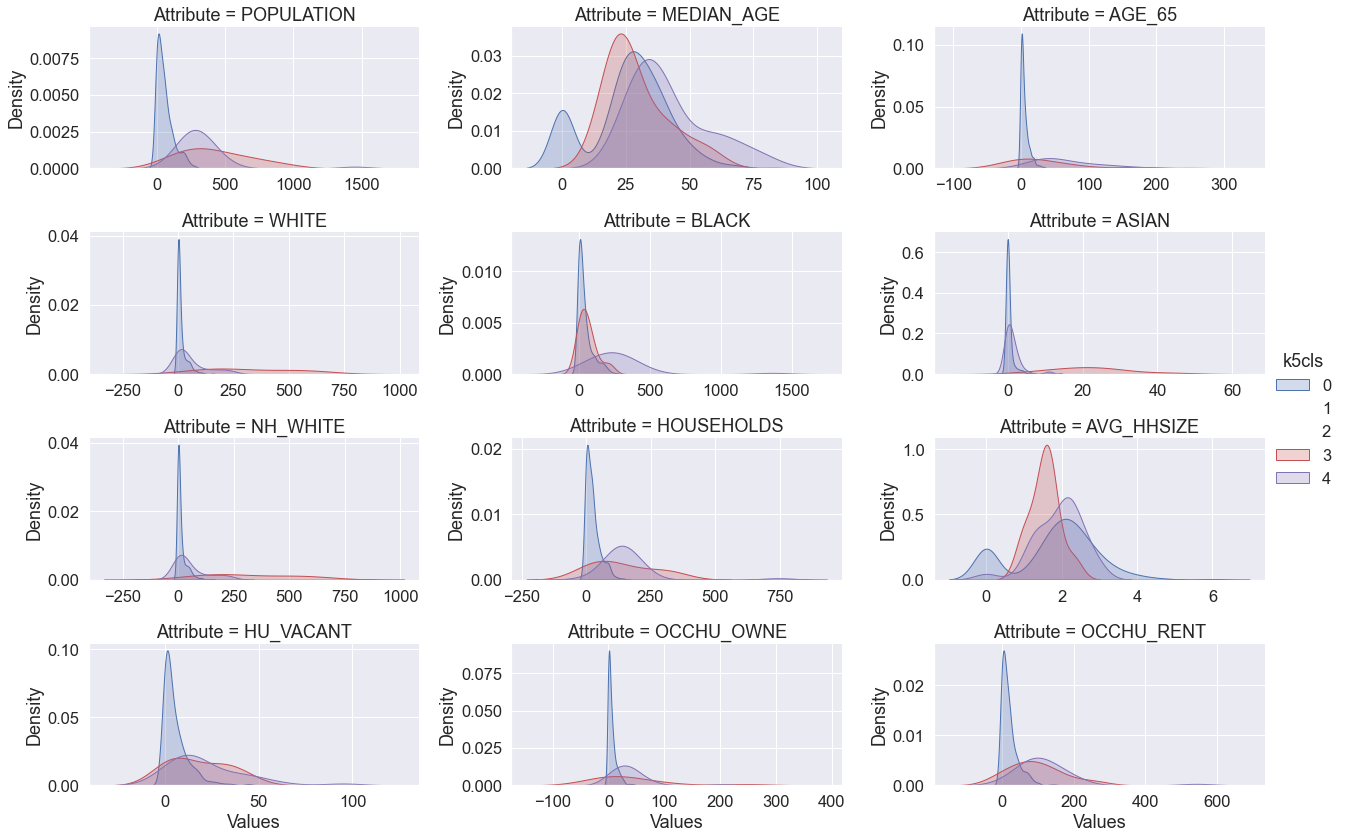

In [23]:
# Scale fonts to make them more readable
sns.set(font_scale=1.5)
# Setup the facets
facets = sns.FacetGrid(
    data=tidy_db,
    col="Attribute",
    hue="k5cls",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3
)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, "Values", fill=True, warn_singular=False).add_legend()

# Hierarchical Clustering 

* Agglomerative Hierarchical Clustering (AHC)
* Hierarchy of solutions (starts at singletons) and assign all observations into same cluster 
* We are looking for in-between clustering solutions 

# AHC Algorithm 

1. Every observation is its own cluster 
2. Find two closest observations based on distance metric (Euclidean Distance) 
3. Join the closest into a new cluster 
4. Repeat 2 and 3 until reaching the desired degree of aggregation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/1280px-Hierarchical_clustering_simple_diagram.svg.png" width='500px'>

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Set seed for reproducibility
np.random.seed(0)
# Iniciate the algorithm
model = AgglomerativeClustering(linkage="ward", n_clusters=5)
# Run clustering
model.fit(db_scaled)
# Assign labels to main data table
cin_df["ward5"] = model.labels_

In [25]:
ward5sizes = cin_df.groupby("ward5").size()
ward5sizes

ward5
0    442
1      5
2      8
3      1
4      1
dtype: int64

In [26]:
ward5means = cin_df.groupby("ward5")[predictors].mean()
ward5means.T.round(3)

ward5,0,1,2,3,4
POPULATION,70.152,583.600,414.625,1108.00,361.00
MEDIAN_AGE,26.969,52.520,24.462,21.80,25.00
AGE_65,7.964,154.600,13.125,6.00,16.00
WHITE,14.760,244.400,313.375,435.00,259.00
BLACK,53.041,324.200,63.500,244.00,5.00
ASIAN,0.550,5.000,25.250,372.00,85.00
NH_WHITE,14.566,242.200,311.125,422.00,258.00
HOUSEHOLDS,31.260,317.200,103.375,356.00,180.00
AVG_HHSIZE,1.835,1.688,1.557,1.92,1.87
HU_VACANT,6.163,38.400,13.000,6.00,13.00


In [27]:
# Index db on cluster ID
tidy_db = cin_df.set_index("ward5")
# Keep only variables used for clustering
tidy_db = tidy_db[predictors]
# Stack column names into a column, obtaining
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
tidy_db.head()

,ward5,Attribute,Values
0,1,POPULATION,479.0
1,1,MEDIAN_AGE,55.7
2,1,AGE_65,174.0
3,1,WHITE,433.0
4,1,BLACK,32.0


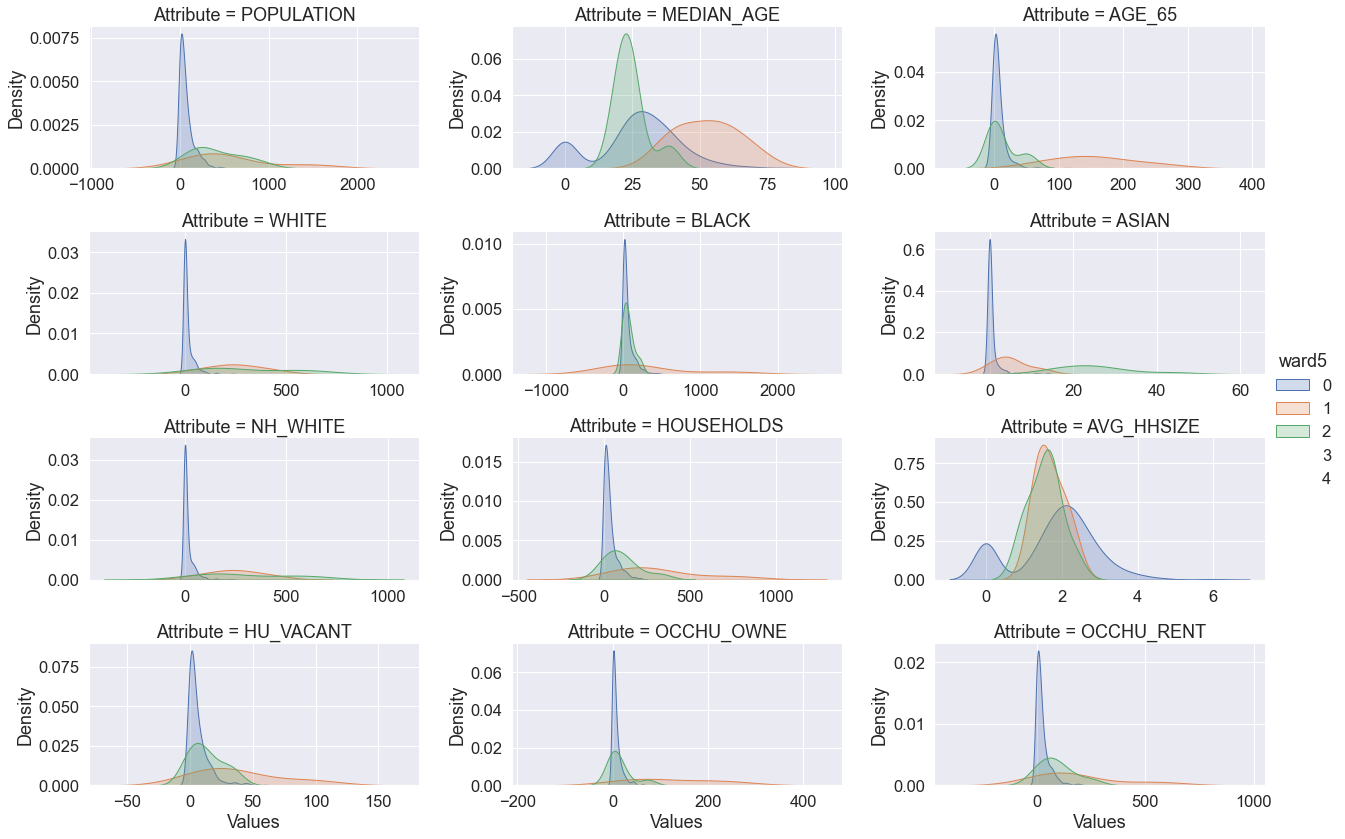

In [28]:
# Setup the facets
facets = sns.FacetGrid(
    data=tidy_db,
    col="Attribute",
    hue="ward5",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)
# Build the plot as a `sns.kdeplot`
facets.map(sns.kdeplot, "Values", fill=True, warn_singular=False).add_legend()

In [29]:
cin_df["ward5"] = model.labels_
# Setup figure and ax
f, axs = plt.subplots(1, 2, figsize=(12, 6))

### K-Means ###
ax = axs[0]
# Plot unique values choropleth including
# a legend and with no boundary lines
cin_df.plot(
    column="ward5",
    categorical=True,
    cmap="Set2",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("K-Means solution ($k=5$)")

### AHC ###
ax = axs[1]
# Plot unique values choropleth including
# a legend and with no boundary lines
cin_df.plot(
    column="k5cls",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("AHC solution ($k=5$)")

# Display the map
f.savefig('two_clust.png')
plt.close()

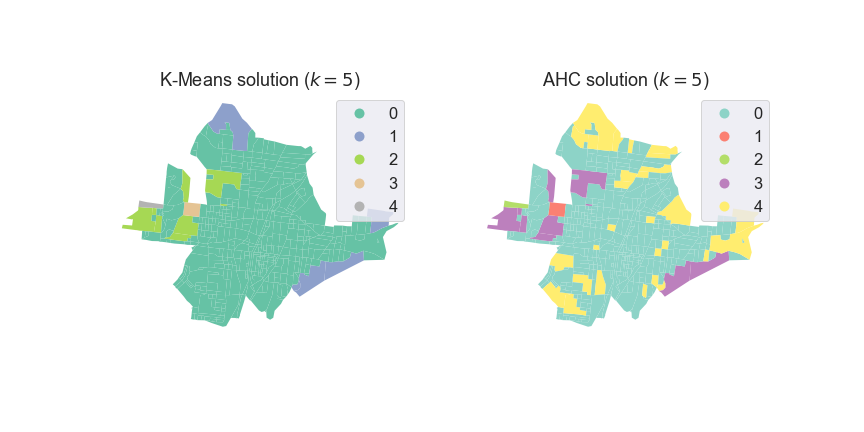

In [30]:
Image(filename='two_clust.png') 

# Regionalization 

## Spatially Constrained Hierarchical Clustering

# Why Regionalization 

* Clustering helps us investigate the structure of our data (spatial contiguity is not always a requirement) 
* We impose spatial constraint on clusters (geographically coherent areas + coherent data profiles) 
* Counties within states (administrative principles), clusters within out data (statistical similarity) 
* Spatial weights matrix can be used as a measure of spatial similarity 

In [31]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
regi = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=5
)
# Fit algorithm to the data
regi.fit(db_scaled)

AgglomerativeClustering(connectivity=<457x457 sparse matrix of type '<class 'numpy.float64'>'
	with 2970 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

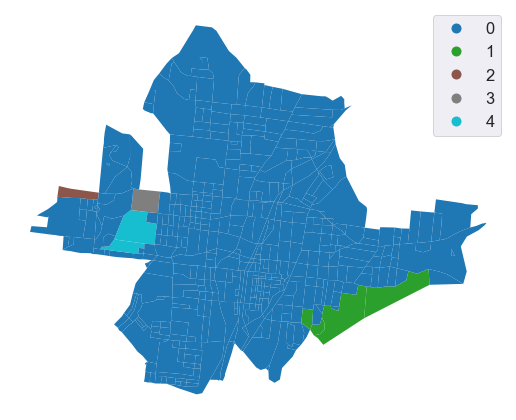

In [32]:
cin_df["ward5wq"] = regi.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
cin_df.plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

# Why are we getting imbalanced clusters? 

* Data is not normal 
* Methods are not robust to outliers 

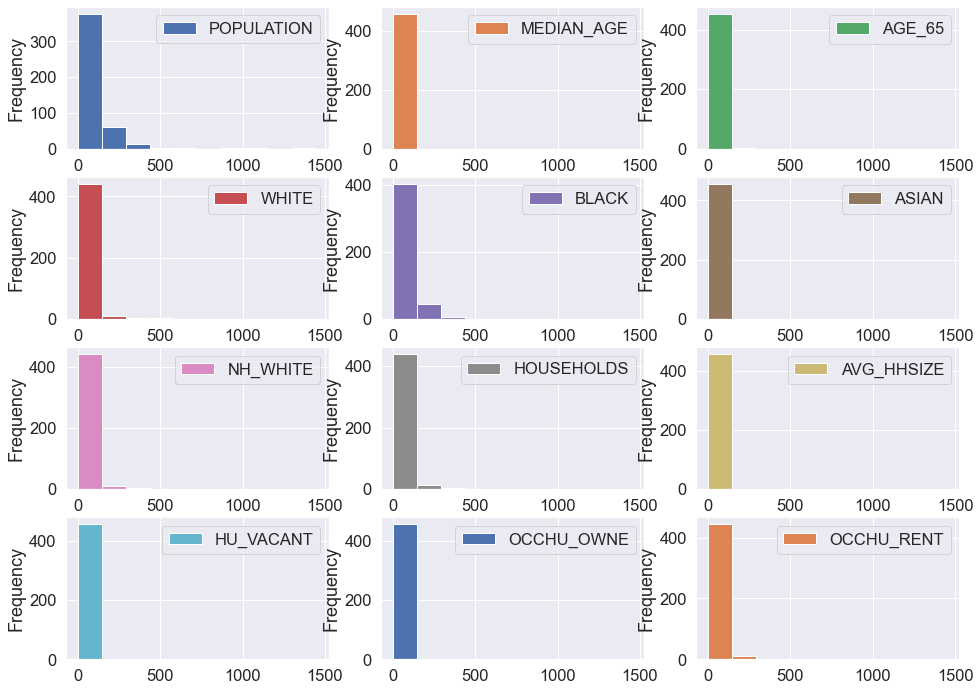

In [33]:
cin_df[predictors].plot.hist(subplots=True, legend=True, layout=(4,3), figsize=(16,12), sharex=False);

# K-Medoids Clustering (PAM)

* Partitioning around medoid (instead of 'mean', select most central actual observation). 
* The medoid of a cluster is defined as the object in the cluster whose average dissimilarity to all the objects in the cluster is minimal, that is, it is a most centrally located point in the cluster. 
* $k$-medoids minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances (depends on implementation), it is more robust to noise and outliers than k-means  

In [34]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=5, random_state=0)

medo = kmedoids.fit(db_scaled)

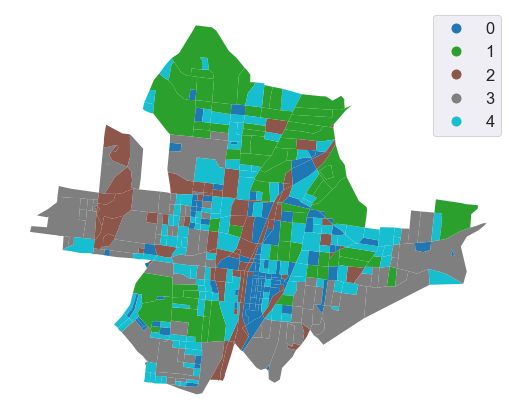

In [35]:
cin_df["medo_k5"] = medo.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
cin_df.plot(
    column="medo_k5",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

In [36]:
# add xy to clustering
cin_df2 = cin_df.copy()

# calculate centroid locs
cin_df2['lng'] = cin_df2.centroid.x
cin_df2['lat'] = cin_df2.centroid.y

# pct vars 
cin_df2['pct_elder']  = cin_df2.AGE_65 / cin_df2.POPULATION
cin_df2['pct_white']  = cin_df2.WHITE / cin_df2.POPULATION
cin_df2['pct_black']  = cin_df2.BLACK / cin_df2.POPULATION
cin_df2['pct_own'] = cin_df2.OCCHU_OWNE / cin_df2.HSNG_UNITS
cin_df2['pct_rent'] = cin_df2.OCCHU_RENT / cin_df2.HSNG_UNITS
cin_df2['pct_vac'] = cin_df2.HU_VACANT / cin_df2.HSNG_UNITS

cin_df2 = cin_df2.fillna(0)

new_predictors = ['POPULATION', 'MEDIAN_AGE', 'lng', 'lat', 'pct_elder', 'pct_white', 'pct_black', 
                 'pct_own', 'pct_rent', 'pct_vac']

In [37]:
db_scaled2 = robust_scale(cin_df2[new_predictors])

In [40]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
regi2 = AgglomerativeClustering(
    linkage="ward", 
    #connectivity=w.sparse, 
    n_clusters=5
)
# Fit algorithm to the data
regi2.fit(db_scaled2)

AgglomerativeClustering(n_clusters=5)

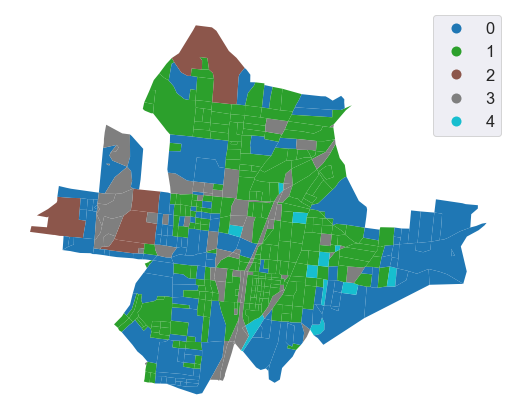

In [41]:
cin_df2["ward5wq"] = regi2.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
cin_df2.plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [42]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
regi2 = AgglomerativeClustering(
    linkage="ward", 
    connectivity=w.sparse, 
    n_clusters=5
)
# Fit algorithm to the data
regi2.fit(db_scaled2)

AgglomerativeClustering(connectivity=<457x457 sparse matrix of type '<class 'numpy.float64'>'
	with 2970 stored elements in Compressed Sparse Row format>,
                        n_clusters=5)

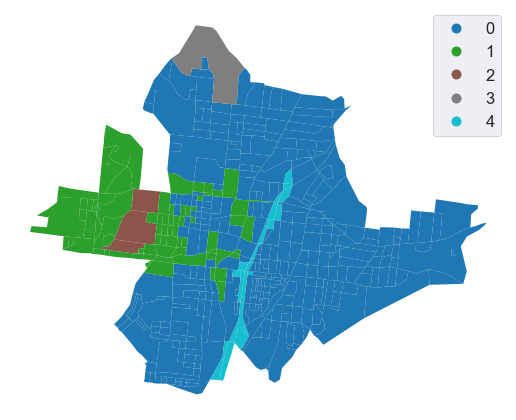

In [43]:
cin_df2["ward5wq"] = regi2.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
cin_df2.plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

# Questions

#### Learn more: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html